In [92]:
#загружаем библиотеки
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [ ]:
df = pd.read_csv("datasets_271144_562549_african_crises.csv")

In [ ]:
#смотрим на наши данные
df

In [151]:
#категориальные переменные
df["banking_crisis"].unique()

array(['crisis', 'no_crisis'], dtype=object)

In [152]:
#"crisis" - 1
#"no_crisis" - 0

In [153]:
df["banking_crisis"].apply(lambda x: ["crisis", "no_crisis"].index(x))

0       0
1       1
2       1
3       1
4       1
       ..
1054    0
1055    1
1056    1
1057    1
1058    1
Name: banking_crisis, Length: 1059, dtype: int64

In [98]:
#смотрим,какие колонки у нас есть
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [99]:
#оставляем все колонки, кроме: 'case' - число, обозначающее определенную страну, 'cc3'-трехзначный код страны,
#'country'-страна (нам нужна только 1 Angola), 'year'- год наблюдения) 

In [100]:
import re

In [154]:
strana = r'Angola'
df2 = df[df['country'].str.contains(strana)]
df2

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
85,2,AGO,Angola,1921,0,1.250000e-08,0,0,0.0,29.629630,0,0,1,no_crisis
86,2,AGO,Angola,1922,0,2.210000e-08,0,0,0.0,45.714286,0,0,1,no_crisis
87,2,AGO,Angola,1923,0,2.810000e-08,0,0,0.0,68.627451,0,0,1,no_crisis
88,2,AGO,Angola,1924,0,2.080000e-08,0,0,0.0,126.744186,0,0,1,no_crisis
89,2,AGO,Angola,1925,0,1.950000e-08,0,0,0.0,-27.179487,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2,AGO,Angola,2010,0,9.264300e+01,0,0,0.0,14.480000,1,0,0,no_crisis
158,2,AGO,Angola,2011,0,9.527200e+01,0,0,0.0,13.484000,1,0,0,no_crisis
159,2,AGO,Angola,2012,0,9.582589e+01,0,0,0.0,10.285000,1,0,0,no_crisis
160,2,AGO,Angola,2013,0,9.756000e+01,0,0,0.0,8.782000,1,0,0,no_crisis


In [102]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
enc = OneHotEncoder(categories='auto')

In [156]:
enc.fit(df2[df.columns[5:14]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [193]:
Y = df2["inflation_crises"].values
#наша модель системного кризиса

In [194]:
df3 = enc.transform(df2[df.columns[5:14]]).toarray()

In [195]:
df3

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [196]:
#обучающие выборки
train_X, test_X, train_Y, test_Y = train_test_split(df3, Y)

In [197]:
model = LogisticRegression()
#используем как модель логистическую регрессию

In [198]:
model.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
#Модель предсказания инфляционного кризиса в Анголе
test_Yhat = model.predict(test_X)

In [200]:
accuracy_score(test_Y, test_Yhat)
balanced_accuracy_score(test_Y, test_Yhat)

1.0

In [201]:
roc_auc_score(test_Yhat, test_Y)

1.0

Модель показывает, что инфляционный кризис будет

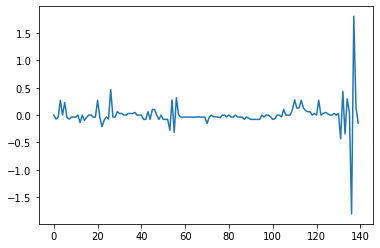

In [206]:
plt.plot(model.coef_.squeeze())

In [203]:
pd.crosstab(df["inflation_crises"], df["inflation_annual_cpi"])
#Видим, что уровень инфляции связан с инфляционном кризисом.

inflation_annual_cpi,-2.850214e+01,-2.717949e+01,-2.092418e+01,-1.807366e+01,-1.742424e+01,-1.724138e+01,-1.687243e+01,-1.683136e+01,-1.600061e+01,-1.594203e+01,...,3.250290e+02,5.858444e+02,5.987448e+02,9.497710e+02,1.281114e+03,1.379476e+03,2.672230e+03,4.146010e+03,6.627989e+04,2.198970e+07
inflation_crises,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [208]:
pd.crosstab(df["inflation_crises"], df["exch_usd"])
#Видим, что курс валюты и уровень инфляции тоже связаны.

exch_usd,0.000000e+00,3.910000e-27,4.000000e-27,4.040000e-27,4.060000e-27,4.080000e-27,4.100000e-27,4.120000e-27,4.280000e-27,4.340000e-27,...,5.402825e+02,5.560371e+02,5.622096e+02,5.760000e+02,5.988096e+02,6.160000e+02,6.254954e+02,6.529534e+02,7.049511e+02,7.443061e+02
inflation_crises,,,,,,,,,,,,,,,,,,,,,
0,52,1,1,1,1,1,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
